In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os




In [2]:
#import data
file = 'bank-marketing.csv'

In [3]:
main_database = pd.read_csv(file)

In [4]:
main_database.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [5]:
main_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
main_database.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
#Dropping age group column to simplify dataset

main_database.drop(columns = ["age group"], inplace=True)

In [8]:
#Replacing all 'yes' and 'no' to binary 1, 0

main_database['eligible'].replace(('Y', 'N'), (1,0), inplace=True)
main_database.replace(('yes', 'no'), (1,0), inplace=True)
main_database

,age,eligible,job,salary,marital,education,marital-education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,1,management,100000,married,tertiary,married-tertiary,1,0,2143,...,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,1,technician,60000,single,secondary,single-secondary,1,0,29,...,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,1,entrepreneur,120000,married,secondary,married-secondary,1,0,2,...,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,1,blue-collar,20000,married,unknown,married-unknown,0,0,1506,...,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,1,unknown,0,single,unknown,single-unknown,0,0,1,...,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,technician,60000,married,tertiary,married-tertiary,1,0,825,...,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,0,retired,55000,divorced,primary,divorced-primary,1,0,1729,...,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,0,retired,55000,married,secondary,married-secondary,1,0,5715,...,cellular,17,nov,1127,5,184,3,success,1,1
45209,57,1,blue-collar,20000,married,secondary,married-secondary,1,0,668,...,telephone,17,nov,508,4,-1,0,unknown,0,0


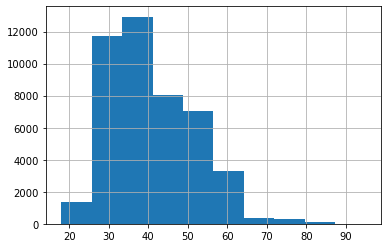

In [9]:
# Checking age distribution
main_database['age'].hist()
plt.show()


Most people are in 30's and 40's.

In [10]:
avg_salary_by_age = main_database.pivot_table(values='age', index='salary', aggfunc=[np.mean])

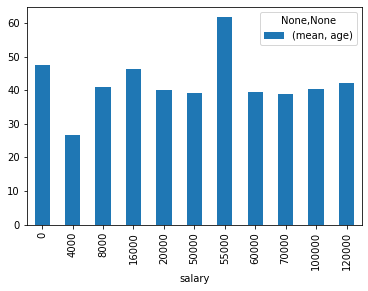

In [11]:
avg_salary_by_age.plot(kind="bar")
plt.show()

Average salary is nearly evenly distributed accross age, 
with the exception of the majority of people earning $55k

In [12]:
corr = main_database.corr().style.background_gradient(cmap='coolwarm')

corr

,age,eligible,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,response
age,1.000000,-0.469109,0.024357,0.113202,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,0.025155
eligible,-0.469109,1.000000,0.017207,-0.022465,0.021089,-0.070580,0.169534,0.058539,0.026446,-0.031335,0.029793,-0.022530,-0.034948,-0.140971,-0.140971
salary,0.024357,0.017207,1.000000,-0.222868,0.006860,0.055469,-0.048965,0.017749,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012,0.020012
targeted,0.113202,-0.022465,-0.222868,1.000000,0.008825,-0.040699,0.075543,0.066297,-0.012891,-0.010280,-0.002597,-0.004350,-0.013253,-0.069039,-0.069039
default,-0.017879,0.021089,0.006860,0.008825,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419,-0.022419
balance,0.097783,-0.070580,0.055469,-0.040699,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,0.052838
housing,-0.185513,0.169534,-0.048965,0.075543,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173,-0.139173
loan,-0.015655,0.058539,0.017749,0.066297,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185,-0.068185
day,-0.009120,0.026446,0.027864,-0.012891,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.028348
duration,-0.004648,-0.031335,-0.009937,-0.010280,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,0.394521
